# Basic checks and plots of SDSS SMBH catalogue

In [1]:
from astropy.io import ascii
import matplotlib.pylab as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# Path to data
path_to_data = '../data'

# AGN catalogue name
cat_name = 'SDSS_SMBH_202206.txt'

# Columns in data
# ra, dec in deg
# logM is log of SMBH mass in M_sol
names = ['ra', 'dec', 'z', 'logM']

In [3]:
# Read catalogue
dat = ascii.read(f'{path_to_data}/{cat_name}', names=names)

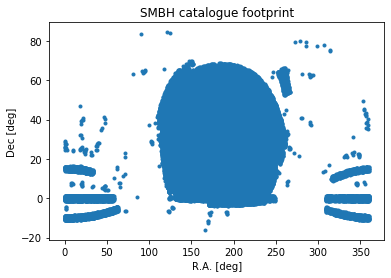

In [4]:
# Plot footprint
plt.plot(dat['ra'], dat['dec'], '.')
plt.xlabel('R.A. [deg]')
plt.ylabel('Dec [deg]')
_ = plt.title('SMBH catalogue footprint')

In [5]:
# Mask objects below UNIONS lowest declination 
m = (dat['dec'] > 30)

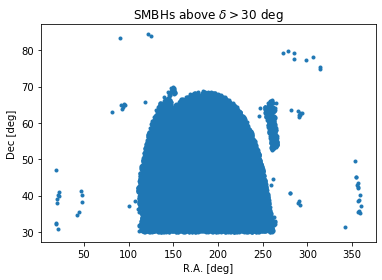

In [6]:
# Plot again
plt.plot(dat['ra'][m], dat['dec'][m], '.')
plt.xlabel('R.A. [deg]')
plt.ylabel('Dec [deg]')
_ = plt.title('SMBHs above $\delta > 30$ deg')

In [7]:
# Print number of objects in UNIONS footprint, and total
print(len(np.where(m)[0]), len(dat))

19759 48346


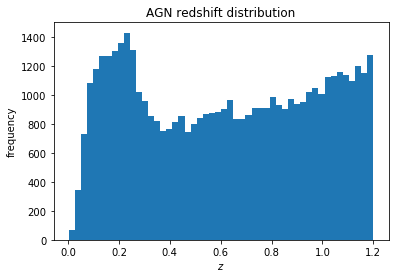

In [8]:
# Redshift distribution
plt.hist(dat['z'], bins=50)
plt.xlabel('$z$')
plt.ylabel('frequency')
_ = plt.title('AGN redshift distribution')

Text(0.5, 1.0, 'AGN SMBH mass distribution')

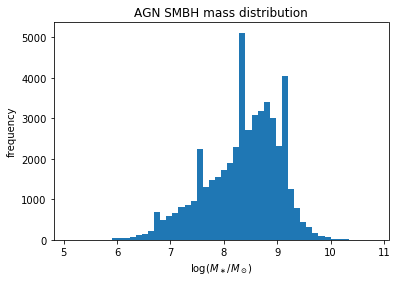

In [9]:
# Mass distribution
plt.hist(dat['logM'], bins=50)
plt.xlabel(r'$\log ( M_\ast / M_\odot )$')
plt.ylabel('frequency')
plt.title('AGN SMBH mass distribution')

In [10]:
# If we want to split the sample into two mass bins, best is maybe at the median
np.median(dat['logM'])

8.5

In [23]:
# To split into more equi-populated bins, compute cumulative distribution function
cdf = ECDF(dat['logM'])

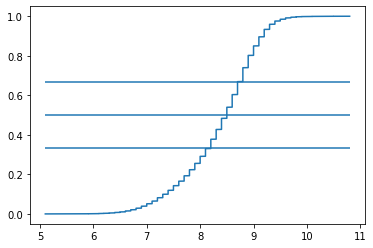

In [25]:
# Plot with some lines to split (e.g. 1/3, 2/3 for split into three samples)
plt.plot(cdf.x, cdf.y, '-')

xmin, xmax = cdf.x[1], cdf.x[-1]
# cdf.x[0] is -infinity

_ = plt.hlines([1/3, 0.5, 2/3], xmin, xmax)

Find mass for split into equi-populated bins

In [26]:
type(cdf)

statsmodels.distributions.empirical_distribution.ECDF

In [27]:
def y_equi(cdf, n):
    """ Y EQUI
    
    Split sample into n equi-populated bins, return bin boundaries.
    
    Parameters
    ----------
    cdf : statsmodels.distributions.empirical_distribution.ECDF
        distribution data
    n : int
        number of splits
        
    Returns
    -------
    list
        bin boundaries of samples
        
    """
    x_list = []
    for denom in range(1, n):
        idx =  np.where(cdf.y >= denom/n)[0][0]
        x_list.append(cdf.x[idx])
    
    return x_list

In [28]:
# Split into two (check whether we get median from before)
y_equi(cdf, 2)

[8.5]

In [29]:
# Split into three
y_equi(cdf, 3)

[8.2, 8.7]

In [30]:
# We can play around...
y_equi(cdf, 5)

[7.8, 8.3, 8.6, 8.9]